In [45]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',10)
import matplotlib.pyplot as plt

In [11]:
name = ['name','sex','births']
names1880 = pd.read_csv('yob1880.txt',names = name )
names1880 

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [12]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [13]:
piece = []
years =range(1880,2011)

for year in years:
    path = 'yob%d.txt'%year
    frame = pd.read_csv(path,names = name)
    
    frame['year'] = year
    piece.append(frame)
    
names = pd.concat(piece,ignore_index = True)
# 必须指定ignore_index=True，因为我们不希望保留read_csv所返回的原始行号。

In [14]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [15]:
total_birth = names.pivot_table('births',index = 'year',columns = 'sex',aggfunc = 'sum')
total_birth['total'] = total_birth['F'] +total_birth['M']
total_birth

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


In [46]:
total_birth.plot(title = 'total btrth')
%matplotlib inline

In [17]:
names.groupby(['year','sex']).size()

year  sex
1880  F        942
      M       1058
1881  F        938
      M        997
1882  F       1028
             ...  
2008  M      14590
2009  F      20123
      M      14479
2010  F      19698
      M      14140
Length: 262, dtype: int64

In [18]:
def add_group(group):
    group['pop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_group)
# pop数据存储的是当前姓名出生人数在当年同性别中所占d的比例
names


,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [19]:
names.groupby(['year','sex']).births.sum()

year  sex
1880  F        90993
      M       110493
1881  F        91955
      M       100748
1882  F       107851
              ...   
2008  M      2032310
2009  F      1827643
      M      1973359
2010  F      1759010
      M      1898382
Name: births, Length: 262, dtype: int64

In [20]:
names.groupby(['year','sex']).pop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: pop, Length: 262, dtype: float64

In [21]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending = False)[:1000]
    
top1000 = names.groupby(['year','sex']).apply(get_top1000)

top1000
# pieces = []
# for year, group in names.groupby(['year', 'sex']):
#     pieces.append(group.sort_values(by='births', ascending=False)[:1000])
# top1000 = pd.concat(pieces, ignore_index=True)

# 作者：SeanCheney
# 链接：https://www.jianshu.com/p/72b6c83bb69e

name sex  births  year       pop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [22]:
top1000.reset_index(inplace = True,drop = True)
top1000

,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [23]:
boys = top1000[top1000.sex =='M']
boys

,name,sex,births,year,pop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [24]:
girls = top1000[top1000.sex =='F']
girls

,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [25]:
total_birth = top1000.pivot_table('births',index = 'year',columns = 'name',aggfunc = 'sum')
total_birth

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
total_birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [27]:
subset = total_birth[['John','Mary','Harry','Zoie']]
subset
subset.John.isna().value_counts()
subset

name,John,Mary,Harry,Zoie
year,,,,
1880,9701.0,7092.0,2158.0,NaN
1881,8795.0,6948.0,2002.0,NaN
1882,9597.0,8179.0,2246.0,NaN
1883,8934.0,8044.0,2116.0,NaN
1884,9427.0,9253.0,2338.0,NaN
...,...,...,...,...
2006,15140.0,4073.0,414.0,530.0
2007,14405.0,3665.0,443.0,526.0
2008,13273.0,3478.0,379.0,492.0


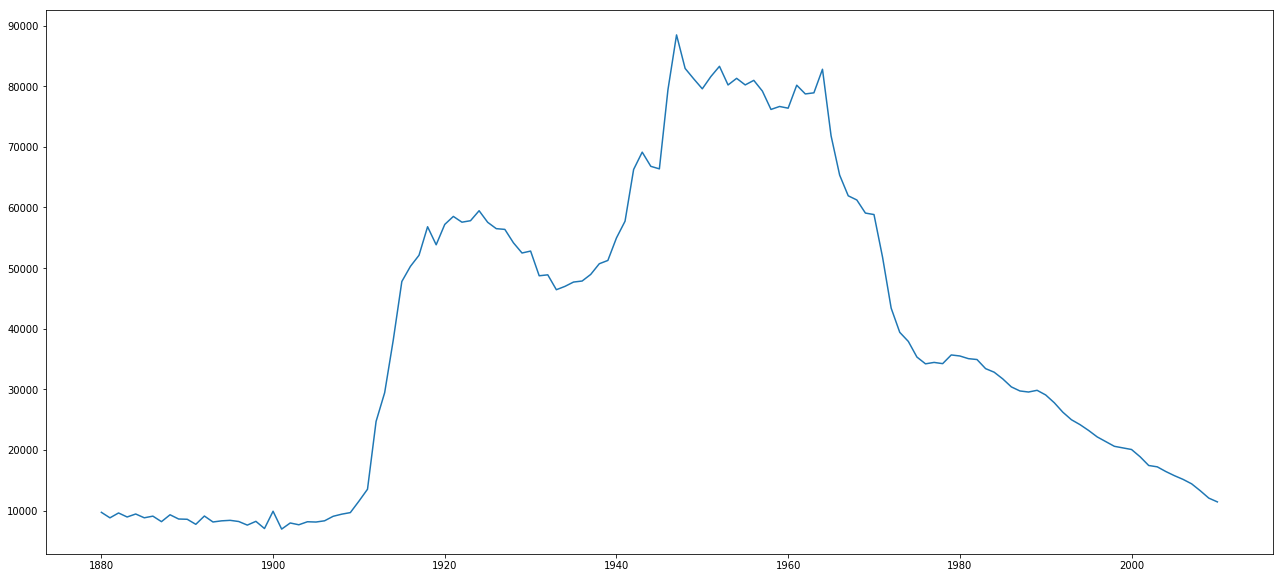

In [28]:
import matplotlib.pyplot as plt
x = subset.index
y = subset.John
plt.figure(figsize=(22, 10))
plt.plot(x,y,)
plt.show()
% matplotlib inline

In [29]:
subset.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year', length=131)

In [30]:
y = subset.John
y

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9427.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: John, Length: 131, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002286F940>,
      dtype=object)

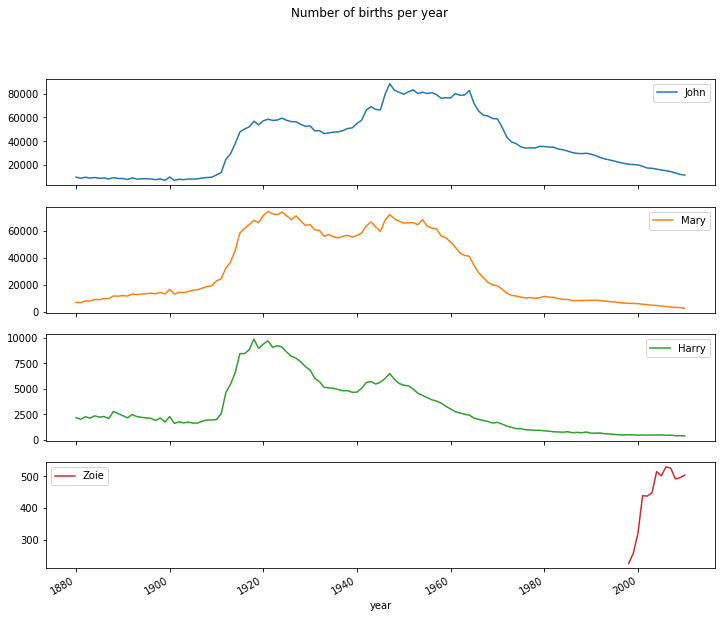

In [31]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

In [32]:
# 评估命名多样性的增长
# 一种解释是父母愿意给小孩起常见的名字越来越少。
# 这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，
# 我按year和sex进行聚合并绘图
table = top1000.pivot_table('pop',index = 'year',columns = 'sex',aggfunc = 'sum')
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


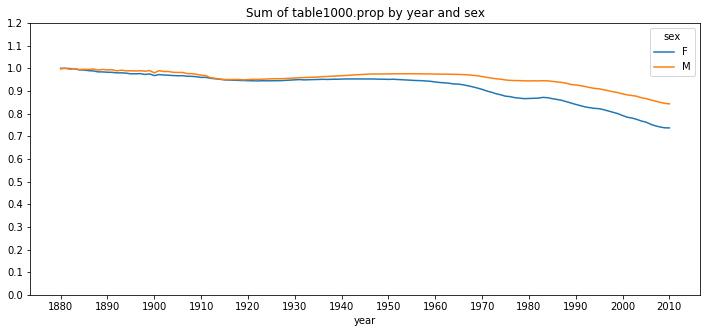

In [33]:
table.plot(yticks = np.linspace(0,1.2,13),xticks = range(1880,2020,10),title ='Sum of table1000.prop by year and sex',figsize=(12, 5))
# 前1000项的比例降低,名字的多样性确实出现了增长

In [34]:
x = range(1880,2020,10)
print(x)

range(1880, 2020, 10)


In [35]:
 np.linspace(0,1.2,13)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

In [36]:
range(1880,2020,10)

range(1880, 2020, 10)

In [37]:
top1000


,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [47]:
top1000.sort_values(by = 'pop',ascending = False)
# 先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by = 'pop',ascending = False)
    return group['pop'].cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [39]:
top1000.sort_values(by = 'pop',ascending = False)['pop'].cumsum()

942         0.087381
2880        0.174420
943         0.260697
6877        0.345700
2881        0.430307
             ...    
153875    245.313145
153876    245.313172
147876    245.313198
147875    245.313225
145876    245.313251
Name: pop, Length: 261877, dtype: float64

In [40]:
series = pd.Series([1,2,3,4,5])


In [41]:
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [42]:
series.cumsum()

0     1
1     3
2     6
3    10
4    15
dtype: int64

In [58]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


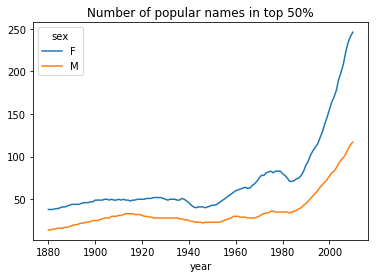

In [59]:
diversity.plot(title="Number of popular names in top 50%")

In [62]:
# 最后一个字母”的变革
get_last_name = lambda x :x[-1]
last_letters = names.name.map(get_last_name)
last_letters.name = 'last_letter'
last_letters[:10]

0    y
1    a
2    a
3    h
4    e
5    t
6    a
7    e
8    a
9    h
Name: last_letter, dtype: object

In [71]:
table_last_name = names.pivot_table('births',index = last_letters,columns = ['sex','year'],aggfunc = 'sum')
table_last_name

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
...              ...      ...      ...    ...          ...       ...   
v                NaN      NaN      NaN    ...       1209.0    1332.0   
w                NaN      NaN      NaN    ...      52265.0   50103.0   
x                NaN      NaN      NaN    ...      10691.0   11009.0   
y            14980.0  17931.0  17601.0    ...     139109.0  134557.0   
z              188.0    238.0    277.0    ...       2840.0    2737.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   
...               ...       ...       ...       ...       ...       ...   
v              1652.0    1823.0    1794.0    2010.0    2295.0    2418.0   
w             49079.0   47556.0   45464.0   43217.0   40251.0   36937.0   
x             11718.0   12399.0   13025.0   13992.0   14306.0   14834.0   
y            130569.0  128367.0  125190.0  123707.0  123397.0  122633.0   
z              2722.0    2710.0    2903.0    3086.0    3301.0    3473.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  
...               ...       ...  
v              2589.0    2723.0  
w             33181.0   30656.0  
x             16640.0   16352.0  
y            112922.0  110425.0  
z              3633.0    3476.0  

[26 rows x 262 columns]

In [72]:
subtable = table_last_name.reindex(columns=[1910, 1960, 2010], level='year')
subtable 

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [73]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [76]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

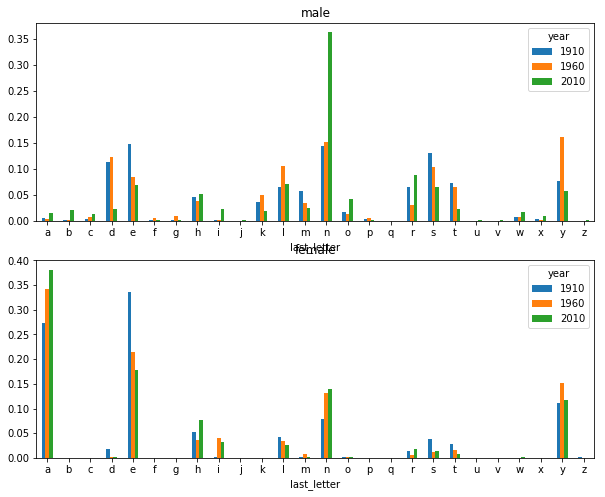

In [82]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize =(10,8))
letter_prop['M'].plot(kind = 'bar',rot = 0,ax = axes[0],title = 'male')
letter_prop['F'].plot(kind = 'bar',rot = 0,ax = axes[1],title = 'female')

In [86]:
table_last_name

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
...              ...      ...      ...    ...          ...       ...   
v                NaN      NaN      NaN    ...       1209.0    1332.0   
w                NaN      NaN      NaN    ...      52265.0   50103.0   
x                NaN      NaN      NaN    ...      10691.0   11009.0   
y            14980.0  17931.0  17601.0    ...     139109.0  134557.0   
z              188.0    238.0    277.0    ...       2840.0    2737.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   
...               ...       ...       ...       ...       ...       ...   
v              1652.0    1823.0    1794.0    2010.0    2295.0    2418.0   
w             49079.0   47556.0   45464.0   43217.0   40251.0   36937.0   
x             11718.0   12399.0   13025.0   13992.0   14306.0   14834.0   
y            130569.0  128367.0  125190.0  123707.0  123397.0  122633.0   
z              2722.0    2710.0    2903.0    3086.0    3301.0    3473.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  
...               ...       ...  
v              2589.0    2723.0  
w             33181.0   30656.0  
x             16640.0   16352.0  
y            112922.0  110425.0  
z              3633.0    3476.0  

[26 rows x 262 columns]

In [87]:
letter_prop = table_last_name/table_last_name.sum()
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2001   
last_letter                                            ...                
a            0.339703  0.335258  0.332764  0.328706    ...     0.020162   
b                 NaN       NaN       NaN       NaN    ...     0.026256   
c                 NaN       NaN       NaN       NaN    ...     0.013972   
d            0.006967  0.007035  0.007266  0.007703    ...     0.031352   
e            0.372802  0.372324  0.373675  0.373736    ...     0.074927   
...               ...       ...       ...       ...    ...          ...   
v                 NaN       NaN       NaN       NaN    ...     0.000623   
w            0.000035       NaN       NaN       NaN    ...     0.026934   
x                 NaN       NaN       NaN       NaN    ...     0.005509   
y            0.103336  0.102615  0.100380  0.098677    ...     0.071687   
z            0.001398  0.001288  0.001332  0.001553    ...     0.001464   

sex                                                                      \
year             2002      2003      2004      2005      2006      2007   
last_letter                                                               
a            0.020019  0.019177  0.019505  0.018481  0.017635  0.016747   
b            0.025418  0.024368  0.023171  0.021645  0.020778  0.020357   
c            0.014048  0.014042  0.013514  0.013083  0.012991  0.012983   
d            0.028794  0.027069  0.026118  0.025420  0.025075  0.024451   
e            0.074603  0.073396  0.071710  0.070799  0.069748  0.069445   
...               ...       ...       ...       ...       ...       ...   
v            0.000687  0.000838  0.000920  0.000900  0.000980  0.001109   
w            0.025840  0.024882  0.023999  0.022809  0.021079  0.019452   
x            0.005678  0.005941  0.006257  0.006534  0.006825  0.006914   
y            0.069397  0.066197  0.064781  0.062806  0.060338  0.059634   
z            0.001412  0.001380  0.001368  0.001456  0.001505  0.001595   

sex                                        
year             2008      2009      2010  
last_letter                                
a            0.016189  0.015927  0.014980  
b            0.019655  0.019693  0.020470  
c            0.012458  0.012186  0.012181  
d            0.023574  0.023398  0.023387  
e            0.069362  0.068663  0.067959  
...               ...       ...       ...  
v            0.001190  0.001312  0.001434  
w            0.018175  0.016814  0.016148  
x            0.007299  0.008432  0.008614  
y            0.060342  0.057223  0.058168  
z            0.001709  0.001841  0.001831  

[26 rows x 262 columns]

In [93]:
m_last_name = letter_prop.loc[['c','d','n'],'M'].T
m_last_name 

last_letter,c,d,n
year,,,
1880,0.003159,0.083055,0.153213
1881,0.003285,0.083247,0.153214
1882,0.003070,0.085340,0.149560
1883,0.002858,0.084066,0.151646
1884,0.002787,0.086120,0.149915
...,...,...,...
2006,0.012991,0.025075,0.351666
2007,0.012983,0.024451,0.358274
2008,0.012458,0.023574,0.361101


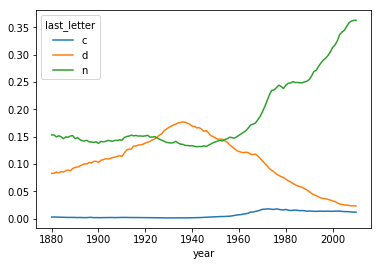

In [94]:
m_last_name .plot()

In [95]:
# 变成女孩名字的男孩名字（以及相反的情况）

In [96]:
all_names = pd.Series(top1000.name.unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [97]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [101]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,pop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [118]:
filtered_table = filtered.pivot_table('births',index = 'year',columns = 'sex',aggfunc='sum')
filtered_table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


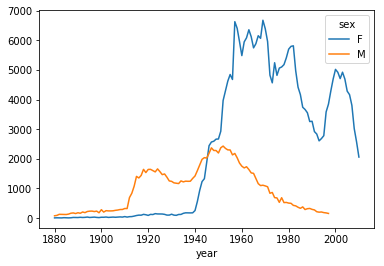

In [103]:
filtered_table.plot()

In [119]:
filtered_table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [109]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [110]:
filtered_table.tail()

sex,F,M
year,,
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN
2009,2573.0,NaN
2010,2060.0,NaN


In [120]:
filtered_table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [121]:
# 按年度进行规范化处理
filtered_table.div(filtered_table.sum(1),axis = 0)


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN
